In [1]:
import cv2
import numpy as np
import os

# --- CONFIGURATION ---
# 1. We read from the folder you already prepared
INPUT_DIR = "Combined_Study_Data"

# 2. We save results to a new folder
OUTPUT_BASE = "Ablation_Study_Results"

# Define 4 separate output folders for the report
dirs = {
    "median": os.path.join(OUTPUT_BASE, "1_Median_Only"),      # Experiment 1: Noise Reduction
    "laplacian": os.path.join(OUTPUT_BASE, "2_Laplacian_Only"),  # Experiment 2: Sharpening
    "clahe": os.path.join(OUTPUT_BASE, "3_CLAHE_Only"),          # Experiment 3: Contrast
    "resolution": os.path.join(OUTPUT_BASE, "4_Resolution_Only") # Experiment 4: Super Resolution
}

# Create the output folders
for d in dirs.values():
    os.makedirs(d, exist_ok=True)

# Get list of images
files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

print(f"--- RUNNING EXPERIMENTS on {len(files)} images from '{INPUT_DIR}' ---")

if len(files) == 0:
    print(f"ERROR: No images found in '{INPUT_DIR}'. Please check the folder name.")
else:
    for i, file in enumerate(files):
        # Read Image
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path, 0) # Read as Grayscale
        if img is None: continue

        # --- EXP 1: Median Blur (Noise Removal) ---
        # Purpose: Remove speckles without blurring edges
        median = cv2.medianBlur(img, 5)
        cv2.imwrite(os.path.join(dirs["median"], file), median)

        # --- EXP 2: Laplacian (Sharpening) ---
        # Purpose: Highlight edges
        # Note: On noisy images, this will look grainy (Good proof for your report!)
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        sharp = cv2.addWeighted(img, 1.5, np.uint8(np.absolute(laplacian)), -0.5, 0)
        cv2.imwrite(os.path.join(dirs["laplacian"], file), sharp)

        # --- EXP 3: CLAHE (Contrast) ---
        # Purpose: Enhance local contrast
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        contrast = clahe.apply(img)
        cv2.imwrite(os.path.join(dirs["clahe"], file), contrast)

        # --- EXP 4: Resolution (Bicubic Upscale) ---
        # Purpose: smooth zoom to 512x512
        high_res = cv2.resize(img, (512, 512), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(os.path.join(dirs["resolution"], file), high_res)

        if (i+1) % 10 == 0:
            print(f"   Processed {i+1} images...")

    print("\nEXPERIMENTS COMPLETE!")
    print(f"Results saved in folder: '{OUTPUT_BASE}'")

--- RUNNING EXPERIMENTS on 48 images from 'Combined_Study_Data' ---
   Processed 10 images...
   Processed 20 images...
   Processed 30 images...
   Processed 40 images...

EXPERIMENTS COMPLETE!
Results saved in folder: 'Ablation_Study_Results'


Generating comparison for: headANT1_1146.jpg


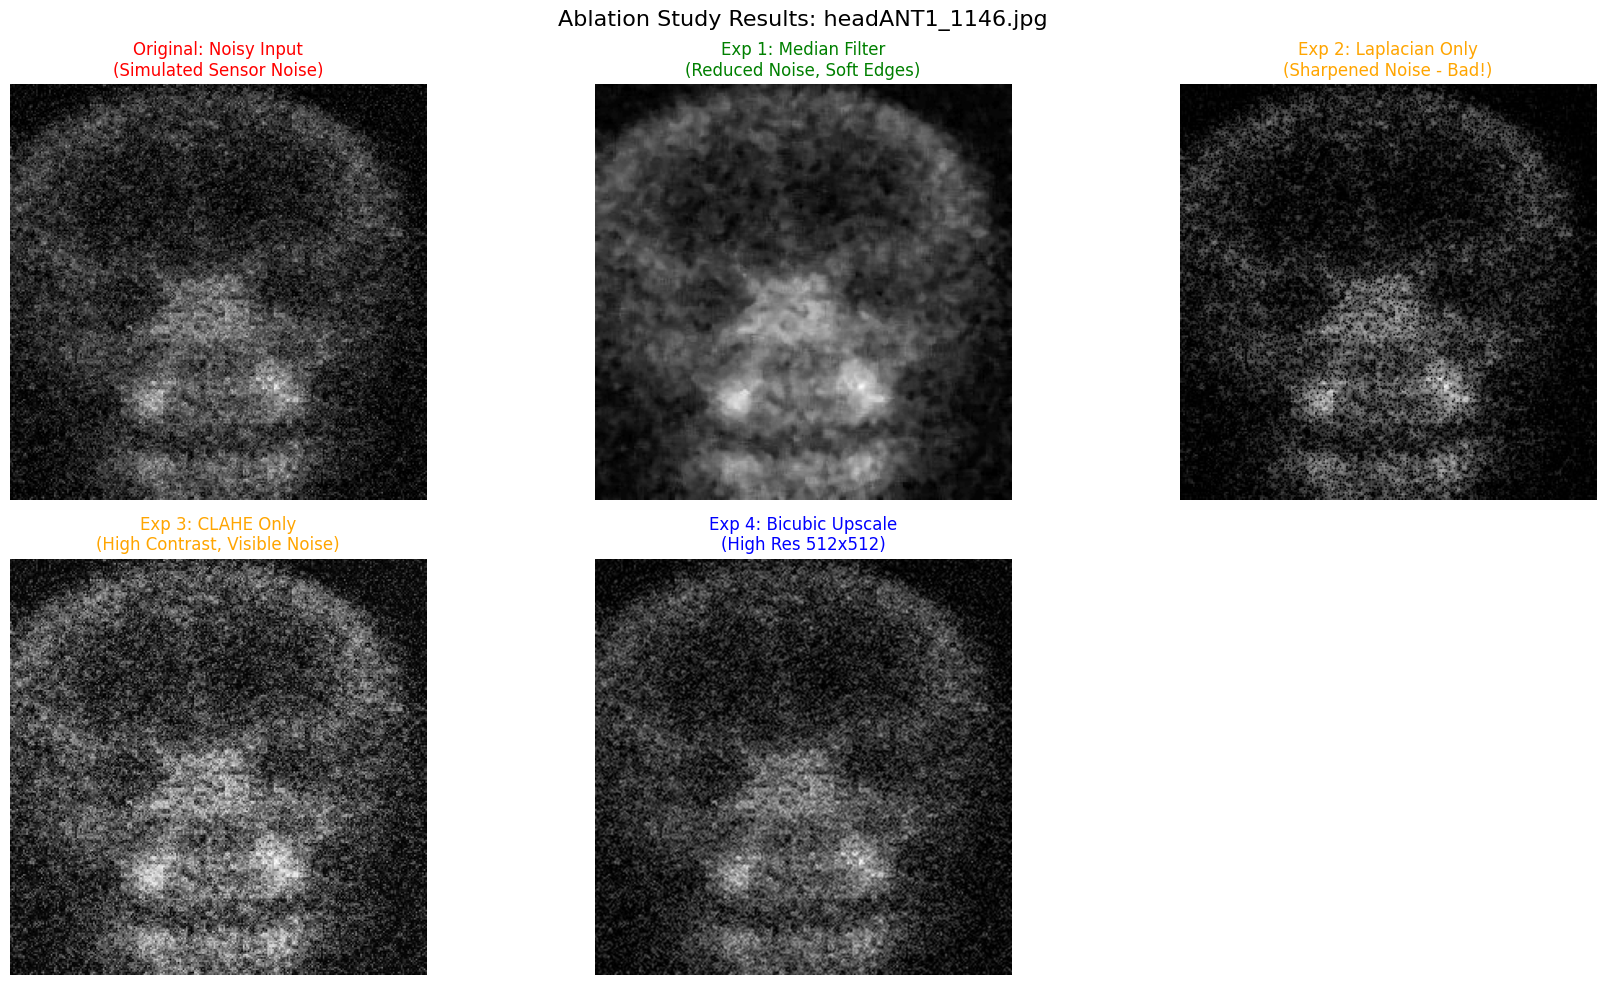

Comparison saved as 'Comparison_Grid.png'. Refresh your file list to download it!


In [2]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# --- CONFIGURATION ---
INPUT_DIR = "Combined_Study_Data"
RESULTS_BASE = "Ablation_Study_Results"

# Define where the experiments live
dirs = {
    "median": os.path.join(RESULTS_BASE, "1_Median_Only"),
    "laplacian": os.path.join(RESULTS_BASE, "2_Laplacian_Only"),
    "clahe": os.path.join(RESULTS_BASE, "3_CLAHE_Only"),
    "resolution": os.path.join(RESULTS_BASE, "4_Resolution_Only")
}

# Get list of original noisy images
files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.jpg', '.png'))]

if not files:
    print("No images found in Combined_Study_Data.")
else:
    # 1. Pick a random image to visualize
    # (Run this cell multiple times to find the best looking example for your report!)
    test_file = random.choice(files)
    print(f"Generating comparison for: {test_file}")

    # 2. Load all 5 versions
    # Original Noisy
    img_noisy = cv2.imread(os.path.join(INPUT_DIR, test_file), 0)
    
    # Experiments
    img_median = cv2.imread(os.path.join(dirs["median"], test_file), 0)
    img_laplacian = cv2.imread(os.path.join(dirs["laplacian"], test_file), 0)
    img_clahe = cv2.imread(os.path.join(dirs["clahe"], test_file), 0)
    img_res = cv2.imread(os.path.join(dirs["resolution"], test_file), 0)

    # 3. Create the Grid Plot
    plt.figure(figsize=(18, 10))
    plt.suptitle(f"Ablation Study Results: {test_file}", fontsize=16)

    # Plot 1: Original
    plt.subplot(2, 3, 1)
    plt.imshow(img_noisy, cmap='gray')
    plt.title("Original: Noisy Input\n(Simulated Sensor Noise)", fontsize=12, color='red')
    plt.axis('off')

    # Plot 2: Median (Noise Reduction)
    plt.subplot(2, 3, 2)
    plt.imshow(img_median, cmap='gray')
    plt.title("Exp 1: Median Filter\n(Reduced Noise, Soft Edges)", fontsize=12, color='green')
    plt.axis('off')

    # Plot 3: Laplacian (Sharpening)
    plt.subplot(2, 3, 3)
    plt.imshow(img_laplacian, cmap='gray')
    plt.title("Exp 2: Laplacian Only\n(Sharpened Noise - Bad!)", fontsize=12, color='orange')
    plt.axis('off')

    # Plot 4: CLAHE (Contrast)
    plt.subplot(2, 3, 4)
    plt.imshow(img_clahe, cmap='gray')
    plt.title("Exp 3: CLAHE Only\n(High Contrast, Visible Noise)", fontsize=12, color='orange')
    plt.axis('off')

    # Plot 5: Resolution (Zoom)
    plt.subplot(2, 3, 5)
    plt.imshow(img_res, cmap='gray')
    plt.title("Exp 4: Bicubic Upscale\n(High Res 512x512)", fontsize=12, color='blue')
    plt.axis('off')

    # 4. Save the result
    save_name = "Comparison_Grid.png"
    plt.tight_layout()
    plt.savefig(save_name, dpi=150) # High DPI for report quality
    plt.show()

    print(f"Comparison saved as '{save_name}'. Refresh your file list to download it!")